# Impot dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
# loading the data
data=pd.read_csv('titanic_train.csv')

In [3]:
#First five rows of data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Number of rows and columns
data.shape

(891, 12)

In [5]:
# Data imformation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#check the missing value in each column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#drop the cabin column
data=data.drop(columns='Cabin')

In [8]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
#replacing missing values in age column with mean value
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
# finding the mode value for Embarked
print(data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [12]:
# replacing missing value in Embarked column with mode value
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
#Getting some statistical measure of data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# number of people survived and not survived
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data Visualisation

<AxesSubplot:xlabel='Survived', ylabel='count'>

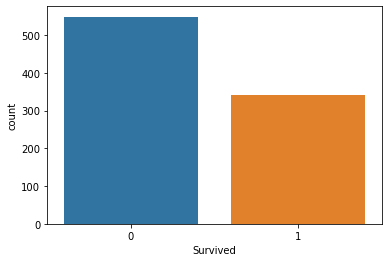

In [16]:
#making a count plot for 'Survived' column
sns.countplot('Survived', data=data)

In [17]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

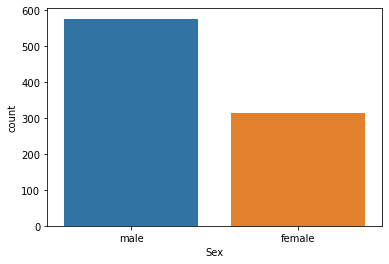

In [18]:
#making a count plot for 'Sex' column
sns.countplot('Sex', data=data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

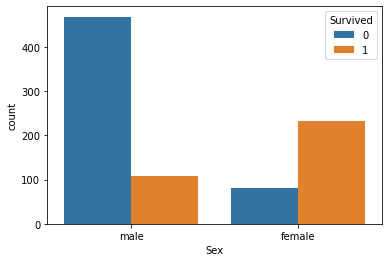

In [19]:
#making a count plot for number of surviver gender wise
sns.countplot('Sex', hue='Survived', data=data)

In [20]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

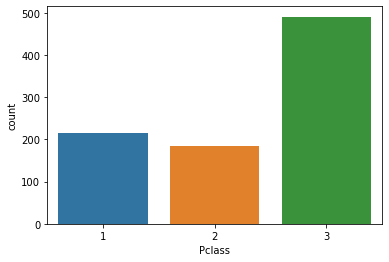

In [21]:
#making a count plot for 'Pclass' column
sns.countplot('Pclass', data=data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

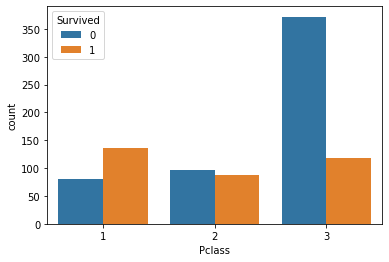

In [22]:
#making a count plot for surviver according to Pclass
sns.countplot('Pclass',hue='Survived', data=data)

# Encoding categorical columns

In [23]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [27]:
data.corr()['Survived'].sort_values()

Pclass        -0.338481
Age           -0.069809
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Embarked       0.106811
Fare           0.257307
Sex            0.543351
Survived       1.000000
Name: Survived, dtype: float64

As we can see the columns SibSp, PassengerId, Parch has very minute impact on survival we can drop these columns. Also columns Name and Ticket will not have any impact on Survival prediction, so we can drop these columns as well.

In [28]:
data=data.drop(columns=['PassengerId','Name','Ticket','Parch','SibSp'],axis=1)

# Seperating feature and target

In [29]:
x=data.drop(columns=['Survived'],axis=1)
y=data['Survived']

In [30]:
print('X is', x)
print('Y is',y)

X is      Pclass  Sex        Age     Fare  Embarked
0         3    0  22.000000   7.2500         0
1         1    1  38.000000  71.2833         1
2         3    1  26.000000   7.9250         0
3         1    1  35.000000  53.1000         0
4         3    0  35.000000   8.0500         0
..      ...  ...        ...      ...       ...
886       2    0  27.000000  13.0000         0
887       1    1  19.000000  30.0000         0
888       3    1  29.699118  23.4500         0
889       1    0  26.000000  30.0000         1
890       3    0  32.000000   7.7500         2

[891 rows x 5 columns]
Y is 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [69]:
logmodel = LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=i)
    logmodel.fit(x_train,y_train)
    pred_train=logmodel.predict(x_train)
    pred_test=logmodel.predict(x_test) 
    if (accuracy_score(y_train,pred_train)*100>80 and accuracy_score(y_test,pred_test)*100>80):
                      print("At random state", i ,"the training accuracy is", accuracy_score(y_train,pred_train))
                      print("At random state", i ,"the training accuracy is", accuracy_score(y_test,pred_test))
                      print("\n")
                      
    
    

At random state 20 the training accuracy is 0.8047752808988764
At random state 20 the training accuracy is 0.8212290502793296


At random state 32 the training accuracy is 0.800561797752809
At random state 32 the training accuracy is 0.8156424581005587


At random state 36 the training accuracy is 0.8019662921348315
At random state 36 the training accuracy is 0.8100558659217877


At random state 37 the training accuracy is 0.8019662921348315
At random state 37 the training accuracy is 0.8044692737430168


At random state 40 the training accuracy is 0.800561797752809
At random state 40 the training accuracy is 0.8044692737430168


At random state 50 the training accuracy is 0.8033707865168539
At random state 50 the training accuracy is 0.8100558659217877


At random state 69 the training accuracy is 0.800561797752809
At random state 69 the training accuracy is 0.8212290502793296


At random state 87 the training accuracy is 0.8033707865168539
At random state 87 the training accuracy is 

At random state 20 we are having best accuracy of the model

In [70]:
#Spliting the data into test and train set
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=20)

In [71]:
print(x.shape,x_train.shape,x_test.shape)

(891, 5) (712, 5) (179, 5)


# Model Training

Logistic regression

In [72]:
# training the logistic regression model with training data
logmodel.fit(x_train,y_train)

LogisticRegression()

# Model Evaluation

Accuracy score

In [73]:
#accuracy on training data
pred_train = logmodel.predict(x_train)

In [75]:
print(accuracy_score(y_train,pred_train))

0.8047752808988764


In [76]:
#accuracy on training data
pred_test = logmodel.predict(x_test)

In [77]:
print(accuracy_score(y_test,pred_test))

0.8212290502793296


In [81]:
from sklearn.metrics import classification_report,confusion_matrix


In [84]:
print('Classification Report\n',classification_report(y_test,pred_test))
print('Confusion Matrix\n', confusion_matrix(y_test,pred_test))



Classification Report
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       112
           1       0.80      0.70      0.75        67

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix
 [[100  12]
 [ 20  47]]


# Cross validation of the model

In [85]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(logmodel,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"AT cross fold {j} the cv score is {cv_mean}")
    print('\n')

AT cross fold 2 the cv score is 0.7878697032297073


AT cross fold 3 the cv score is 0.7867564534231201


AT cross fold 4 the cv score is 0.7878943966387912


AT cross fold 5 the cv score is 0.7845081915761722


AT cross fold 6 the cv score is 0.7901021827196324


AT cross fold 7 the cv score is 0.7822606158605174


AT cross fold 8 the cv score is 0.7833916505791506


AT cross fold 9 the cv score is 0.7822671156004488




At cross fold 6 we are getting nearest value to our accuracy score. Hence we will use this value.

In [87]:
cv_score=cross_val_score(logmodel,x,y,cv=6)
cv_mean=cv_score.mean()
print(f"AT cross fold 6 the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test)-cv_mean)

AT cross fold 6 the cv score is 0.7901021827196324
Difference between accuracy and validation score 0.03112686755969718


# Ensemble Technique

In [88]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix

In [89]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [92]:
pred_test_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,pred_test_rfc))
print(confusion_matrix(y_test,pred_test_rfc))
print(classification_report(y_test,pred_test_rfc))

0.8268156424581006
[[100  12]
 [ 19  48]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       112
           1       0.80      0.72      0.76        67

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



In [94]:
# cross validation of RandomForestClassifier model
cv_score=cross_val_score(rfc,x,y,cv=6)
cv_mean=cv_score.mean()
print(f"AT cross fold 6 the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_rfc)-cv_mean)

AT cross fold 6 the cv score is 0.8249365136949031
Difference between accuracy and validation score 0.0018791287631975129


GradientBoostingClassifier

In [95]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred_test_gb=gb.predict(x_test)
print(accuracy_score(y_test,pred_test_gb))
print(confusion_matrix(y_test,pred_test_gb))
print(classification_report(y_test,pred_test_gb))

0.8156424581005587
[[100  12]
 [ 21  46]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       112
           1       0.79      0.69      0.74        67

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



In [96]:
# cross validation of GradientBoostingClassifier model
cv_score=cross_val_score(gb,x,y,cv=6)
cv_mean=cv_score.mean()
print(f"AT cross fold 6 the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_gb)-cv_mean)

AT cross fold 6 the cv score is 0.8305369127516778
Difference between accuracy and validation score -0.01489445465111916


AdaBoostClassifier

In [97]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred_test_ada=ada.predict(x_test)
print(accuracy_score(y_test,pred_test_ada))
print(confusion_matrix(y_test,pred_test_ada))
print(classification_report(y_test,pred_test_ada))

0.8212290502793296
[[101  11]
 [ 21  46]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       112
           1       0.81      0.69      0.74        67

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



In [98]:
# cross validation of AdaBoostClassifier model
cv_score=cross_val_score(ada,x,y,cv=6)
cv_mean=cv_score.mean()
print(f"AT cross fold 6 the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_ada)-cv_mean)

AT cross fold 6 the cv score is 0.8080899691637947
Difference between accuracy and validation score 0.013139081115534856


BaggingClassifier

In [99]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)
pred_test_bag=bag.predict(x_test)
print(accuracy_score(y_test,pred_test_bag))
print(confusion_matrix(y_test,pred_test_bag))
print(classification_report(y_test,pred_test_bag))

0.8212290502793296
[[99 13]
 [19 48]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       112
           1       0.79      0.72      0.75        67

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [100]:
# cross validation of BaggingClassifier model
cv_score=cross_val_score(bag,x,y,cv=6)
cv_mean=cv_score.mean()
print(f"AT cross fold 6 the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_bag)-cv_mean)

AT cross fold 6 the cv score is 0.8102968740552633
Difference between accuracy and validation score 0.010932176224066281


ExtraTreesClassifier

In [101]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred_test_etc=etc.predict(x_test)
print(accuracy_score(y_test,pred_test_etc))
print(confusion_matrix(y_test,pred_test_etc))
print(classification_report(y_test,pred_test_etc))


0.8156424581005587
[[98 14]
 [19 48]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       112
           1       0.77      0.72      0.74        67

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [102]:
# cross validation of ExtraTreesClassifier model
cv_score=cross_val_score(etc,x,y,cv=6)
cv_mean=cv_score.mean()
print(f"AT cross fold 6 the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_etc)-cv_mean)

AT cross fold 6 the cv score is 0.804741822359272
Difference between accuracy and validation score 0.010900635741286635


Support Vector Classifier

In [103]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_test_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_test_svc))
print(confusion_matrix(y_test,pred_test_svc))
print(classification_report(y_test,pred_test_svc))


0.6759776536312849
[[98 14]
 [44 23]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       112
           1       0.62      0.34      0.44        67

    accuracy                           0.68       179
   macro avg       0.66      0.61      0.61       179
weighted avg       0.66      0.68      0.65       179



In [104]:
# cross validation of RandomForestClassifier model
cv_score=cross_val_score(svc,x,y,cv=6)
cv_mean=cv_score.mean()
print(f"AT cross fold 6 the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_svc)-cv_mean)

AT cross fold 6 the cv score is 0.6678456980470404
Difference between accuracy and validation score 0.00813195558424451


# Tuning

In [109]:
from sklearn.model_selection import RandomizedSearchCV

parameters={
    
    "max_depth":[3,5,8],
    "max_features":["auto", "sqrt", "log2"],
    "criterion":["gini", "entropy"],
    "n_estimators":[50,100,150]
    }

In [110]:
clf=RandomizedSearchCV(RandomForestClassifier(),parameters)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'gini'}


In [112]:
final_model=RandomForestClassifier(n_estimators= 100, max_features='sqrt', max_depth= 8, criterion= 'gini')
final_model.fit(x_train, y_train)
results=final_model.predict(x_test)
print(accuracy_score(y_test,results)*100)

83.24022346368714


# AUC ROC curve

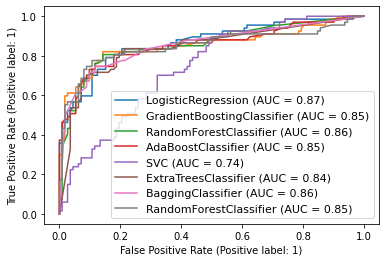

In [113]:
from sklearn.metrics import plot_roc_curve

disp=plot_roc_curve(logmodel,x_test, y_test)
plot_roc_curve(gb,x_test, y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test, y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test, y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test, y_test,ax=disp.ax_)
plot_roc_curve(etc,x_test, y_test,ax=disp.ax_)
plot_roc_curve(bag,x_test, y_test,ax=disp.ax_)
plot_roc_curve(final_model,x_test, y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

# Model Saving

In [114]:
import pickle
filename='titanic_survial.pkl'
pickle.dump(final_model, open(filename,'wb'))

# Conclusion

In [115]:
a=np.array(y_test)
predicted=np.array(results)
df=pd.DataFrame({'Original':a,'Predicted':predicted})

In [116]:
df

,Original,Predicted
0,1,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
174,0,0
175,0,0
176,1,0
177,0,0
